## Setup and Import Libraries

In [1]:
import os
import random
from typing_extensions import TypedDict
from typing import Literal
from dataclasses import dataclass
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

##  State Schema With DataClasses

When we define a LangGraph StateGraph, we use a state schema.

The state schema represents the structure and types of data that our graph will use.

All nodes are expected to communicate with that schema.

LangGraph offers flexibility in how you define your state schema, accommodating various Python types and validation approaches!

we can use the TypedDict class from python's typing module.

It allows you to specify keys and their corresponding value types.

But, note that these are type hints.

They can be used by static type checkers (like mypy) or IDEs to catch potential type-related errors before the code is run.

But they are not enforced at runtime!

In [2]:
class TypedDictState(TypedDict):
    name:str
    game:Literal["Cricket", "Badminton"]

In [3]:
def play_game(state:TypedDictState):
    print("---Play Game node has been called--")
    return {"name":state['name'] + " want to play "}

def cricket(state:TypedDictState):
    print("-- Cricket node has been called--")
    return {"name":state["name"] + " cricket","game":"Cricket"}

def badminton(state:TypedDictState):
    print("-- Badminton node has been called--")
    return {"name":state["name"] + " badminton","game":"Badminton"}

In [4]:
def decide_play(state:TypedDictState) -> Literal["Cricket","Badminton"]:
    if random.random() < 0.5:
        return "Cricket"
    else:
        return "Badminton"

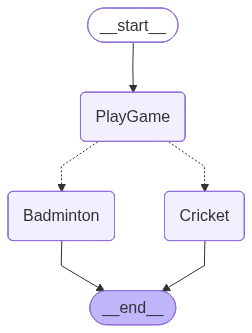

In [5]:
graph_builder = StateGraph(TypedDictState)

# Add Nodes
graph_builder.add_node(node="PlayGame", action=play_game)
graph_builder.add_node(node="Cricket", action=cricket)
graph_builder.add_node(node="Badminton", action=badminton)

# Add Edges
graph_builder.add_edge(start_key=START, end_key="PlayGame")
graph_builder.add_conditional_edges(source="PlayGame", path=decide_play)
graph_builder.add_edge(start_key="Cricket", end_key=END)
graph_builder.add_edge(start_key="Badminton", end_key=END)

# Compile Graph
compiled_graph = graph_builder.compile()

# Display Graph
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

In [6]:
compiled_graph.invoke({"name":"Saad Tariq"})

---Play Game node has been called--
-- Badminton node has been called--


{'name': 'Saad Tariq want to play  badminton', 'game': 'Badminton'}

In [7]:
compiled_graph.invoke({"name":"John Doe"})

---Play Game node has been called--
-- Cricket node has been called--


{'name': 'John Doe want to play  cricket', 'game': 'Cricket'}

## Using Data Classes

Python's dataclasses provide another way to define structured data.

Dataclasses offer a concise syntax for creating classes that are primarily used to store data.

In [8]:
@dataclass
class DataClassState:
    name:str
    game:Literal["Badminton","Cricket"]

In [9]:
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {"name":state.name + " want to play "}

def cricket(state:DataClassState):
    print("-- Cricket node has been called--")
    return {"name":state.name + " cricket","game":"Cricket"}

def badminton(state:DataClassState):
    print("-- badminton node has been called--")
    return {"name":state.name + " badminton","game":"Badminton"}

In [10]:
def decide_play(state:DataClassState) -> Literal["Cricket","Badminton"]:
    if random.random() < 0.5:
        return "Cricket"
    else:
        return "Badminton"

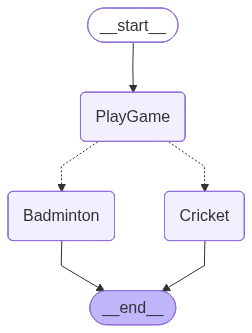

In [11]:
graph_builder = StateGraph(DataClassState)

# Add Nodes
graph_builder.add_node(node="PlayGame", action=play_game)
graph_builder.add_node(node="Cricket", action=cricket)
graph_builder.add_node(node="Badminton", action=badminton)

# Add Edges
graph_builder.add_edge(start_key=START, end_key="PlayGame")
graph_builder.add_conditional_edges(source="PlayGame", path=decide_play)
graph_builder.add_edge(start_key="Cricket", end_key=END)
graph_builder.add_edge(start_key="Badminton", end_key=END)

# Compile Graph
compiled_graph = graph_builder.compile()

# Display Graph
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

In [12]:
compiled_graph.invoke(DataClassState(name="Saad Tariq", game="Cricket"))

---Play Game node has been called--
-- badminton node has been called--


{'name': 'Saad Tariq want to play  badminton', 'game': 'Badminton'}

In [14]:
compiled_graph.invoke(DataClassState(name="John Doe", game="Badminton"))

---Play Game node has been called--
-- badminton node has been called--


{'name': 'John Doe want to play  badminton', 'game': 'Badminton'}